<a href="https://colab.research.google.com/github/mohansharma077/Stock-Price-Prediction-Using-Python-Machine-Learning/blob/main/APPLE_Stock_Price_Price_prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#This program uses an artificial recurrent neural network called LSTM (long short Term Memory)
# to predict the the closing stock price of a corporation Apple Inc. using  past 60 days stock price

In [89]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
 #get the stock
import yfinance as yf
df = yf.download('AAPL', start = '2012-01-01', end='2019-12-17')

[*********************100%***********************]  1 of 1 completed


In [91]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519276,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586559,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859332,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838933,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.755959,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.316826,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.485817,137310400


In [92]:
df.shape

(2002, 6)

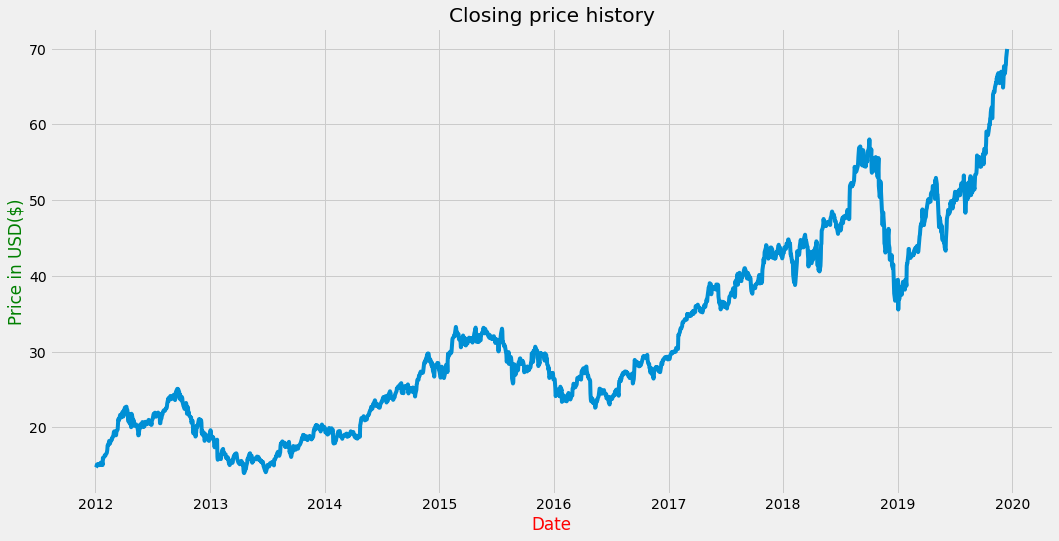

In [93]:
#visualize the closing price
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date',color='red')
plt.ylabel('Price in USD($)',color='green')
plt.show()

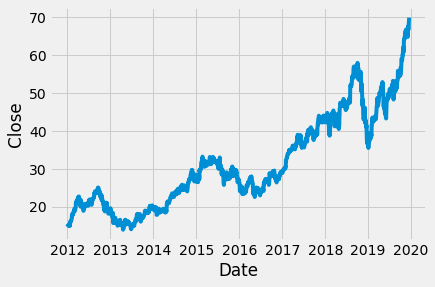

In [94]:
sns.lineplot(x='Date',y='Close',data=df)

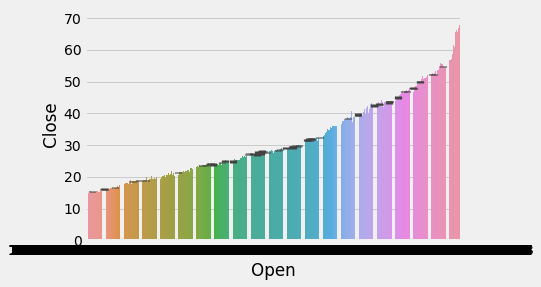

In [95]:
sns.barplot(x='Open',y='Close',data=df)

In [96]:
#creating a new dataframe using close columns 
data=df.filter(['Close'])
#converting data into numpy arrays
datasets=data.values
datasets

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [67.86499786],
       [68.78749847],
       [69.96499634]])

In [97]:
training_data_len=math.ceil(len(datasets) *0.8)
training_data_len

1602

In [98]:
#scale the data

In [99]:
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(datasets)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [100]:
#creating training datasets
#creating the scaled training data
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train & y_train

x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <=60:
    print(x_train)


[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]


In [101]:
    print(y_train)

[0.139835129205152, 0.13326193905670414, 0.1454265118533124, 0.15224196176817417, 0.14904781016068447, 0.1550217351104134, 0.15664748030605152, 0.1516809337750326, 0.15025280989833567, 0.14806596861123794, 0.1368832373640762, 0.12088060931378652, 0.1397331179247337, 0.1388660560903373, 0.12554112200355055, 0.11632207385528176, 0.11550598361193548, 0.10822511574245502, 0.1399243720509385, 0.13845801096866417, 0.1354614806801156, 0.12333517913824371, 0.12215571626985605, 0.12461028609431324, 0.12195806090175587, 0.11139376452984018, 0.11409062816987031, 0.11326180354105125, 0.11389933999450652, 0.11475366744343013, 0.1123246004390775, 0.10691173753164912, 0.10369208310405481, 0.09917181890028637, 0.08899643202267565, 0.08916218332877585, 0.10886265219591029, 0.10611481696483005, 0.11477920431269373, 0.11143840297731294, 0.10950658989126094, 0.11586939028613585, 0.12026854163127682, 0.11935047415667127, 0.10867776526244188, 0.11078169684733047, 0.10985086093809315, 0.11535300074046706, 0.

In [102]:
#convert x_train & y_train to numpy array

In [103]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [104]:
#reshape the data
x_train.shape

(1542, 60)

In [105]:
y_train.shape

(1542,)

In [106]:
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [107]:
#build the lstm model

In [108]:
model=Sequential()

In [109]:
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [110]:
#compile the model

In [114]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [115]:
#train the model

In [117]:
model.fit(x_train,y_train, batch_size=1,epochs=1)

1542/1542 [==============================] - 39s 23ms/step - loss: 8.6053e-04


In [119]:
#creating testing datasets
#creating numpy array containing scaled value from index 1543 to 2003

In [120]:
test_data=scaled_data[training_data_len -60:,:]

In [121]:
#create the test datasets

In [123]:
x_test=[]
y_test=datasets[training_data_len:,:]


In [124]:
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0 ])

In [125]:
#convert the data to numpy array
x_test=np.array(x_test)

In [126]:
#reshape the data
x_test.shape

(400, 60)

In [127]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [128]:
predictions=model.predict(x_test)

13/13 [==============================] - 2s 15ms/step


In [131]:
predictions=scalar.inverse_transform(predictions)
predictions

array([[2630.764 ],
       [2639.7102],
       [2644.7065],
       [2646.3325],
       [2648.336 ],
       [2649.549 ],
       [2652.222 ],
       [2654.9597],
       [2658.174 ],
       [2660.236 ],
       [2661.0017],
       [2660.1697],
       [2664.0107],
       [2671.955 ],
       [2683.2048],
       [2695.745 ],
       [2706.6624],
       [2712.8948],
       [2715.6077],
       [2718.0386],
       [2717.5615],
       [2716.0469],
       [2711.1829],
       [2705.279 ],
       [2694.8357],
       [2684.8982],
       [2674.674 ],
       [2664.7122],
       [2651.7712],
       [2642.5671],
       [2635.6187],
       [2632.6265],
       [2631.1604],
       [2633.8208],
       [2632.9336],
       [2632.9426],
       [2637.2617],
       [2647.0283],
       [2657.7466],
       [2663.8567],
       [2672.1228],
       [2680.7334],
       [2687.8484],
       [2694.3088],
       [2698.052 ],
       [2702.4546],
       [2705.897 ],
       [2708.7952],
       [2713.2744],
       [2720.7576],


In [142]:
rmse=np.sqrt(np.mean((predictions- y_test)**2))
rmse
#plot the data

2818.636109975484

<ipython-input-153-17ce51e15541>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


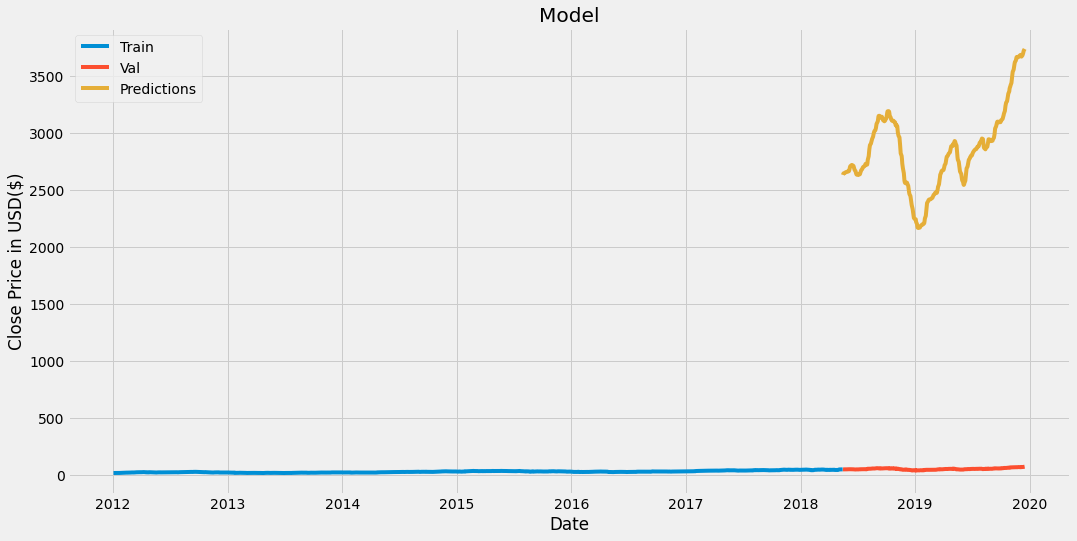

In [153]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price in USD($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='upper left')
plt.show()

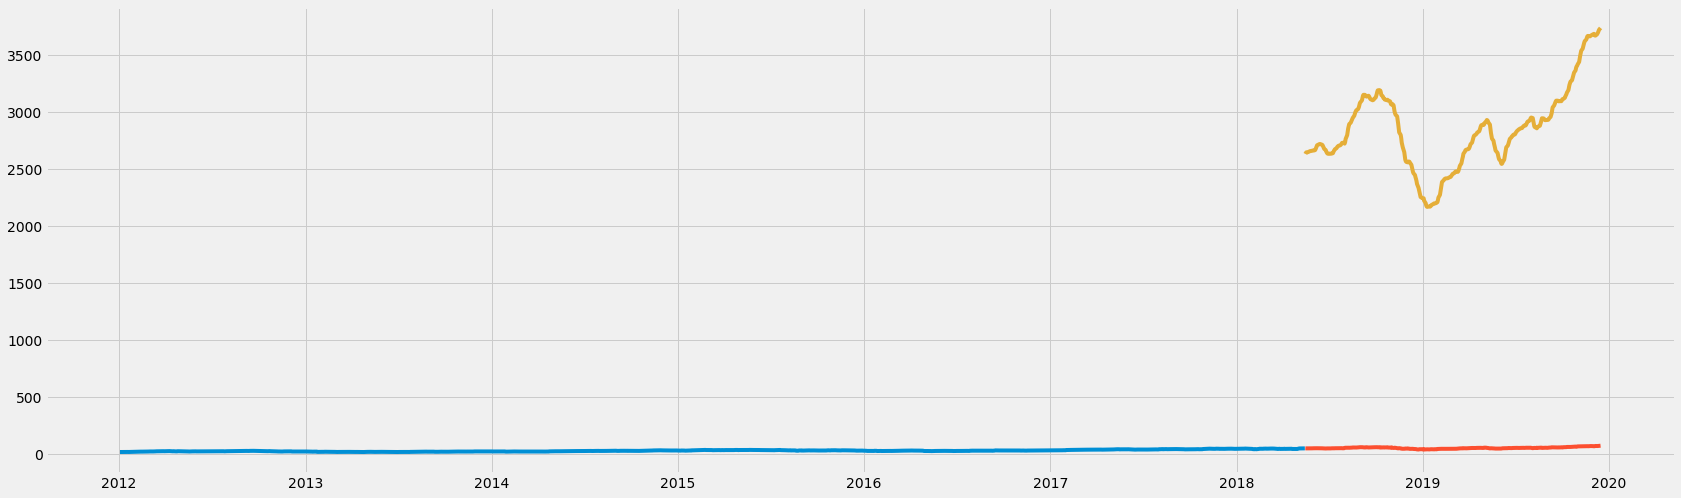

In [154]:
plt.figure(figsize=(26,8))
plt.plot(train['Close']) + plt.plot(valid[['Close','Predictions']])

In [155]:
#show the valid and predicted prices

In [156]:
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,2630.763916
2018-05-17,46.747501,2639.710205
2018-05-18,46.577499,2644.706543
2018-05-21,46.907501,2646.332520
2018-05-22,46.790001,2648.335938
...,...,...
2019-12-10,67.120003,3687.894287
2019-12-11,67.692497,3696.472168
2019-12-12,67.864998,3707.753418


In [166]:
#get the quote
import yfinance as yf
apple_quote = yf.download('AAPL', start = '2012-01-01', end='2019-12-17')

[*********************100%***********************]  1 of 1 completed


In [169]:
new_df=apple_quote.filter(['Close'])
last_60_days=new_df[-60:].values

In [176]:
last_60_days_scaled=scalar.transform(last_60_days)
X_test=[]
last_60_days_scaled
X_test.append(last_60_days_scaled)


X_test=np.array(X_test)



In [178]:

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [180]:
pred_price = model.predict(X_test)
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 20ms/step
[[66.87312]]


In [187]:
#apple quote 2
apple_quote2 = yf.download('AAPL', start = '2019-12-18', end='2019-12-19')

[*********************100%***********************]  1 of 1 completed


In [188]:
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64


In [189]:
#this model predict = quite good as the predict close price is 66 and as of real close price is 69.



In [190]:
import pickle

In [193]:
model='model.sav'
pickle.dump(model,open(model,'wb'))

In [194]:
model

'model.sav'

In [198]:
pickle_model=pickle.load(open('model.sav','rb'))

In [199]:
print(pickle_model)

model.sav
